# **Project Data Science Telco Company Churning Customer**


Dataset yg sudah bisa di baca langsung dengan link ini:

https://raw.githubusercontent.com/dwisyanto9/Telco-Customer-Churn/main/Telco_Customer_Churn.csv



--


Original Dataset ada di: https://raw.githubusercontent.com/dwisyanto9/Telco-Customer-Churn/main/WA_Fn-UseC_-Telco-Customer-Churn.csv





# **Stage 1 - 2 - Introduction to Dataset**



In [ ]:
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.a. Membaca sumber data, melihat tipe data dan membuat deskripsi data dengan Python

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/dwisyanto9/Telco-Customer-Churn/main/Telco_Customer_Churn.csv')
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'].replace(" ", '0'))

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [9]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,6156-UZDLF,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# cek Unique values di kolom  Numerical
data.select_dtypes(include="object").nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [15]:
# cek duplikasi
data.duplicated().sum()

0

In [17]:
# check missing values di data
df_null_summary = pd.concat(
    [data.isnull().sum(), data.isnull().sum() * 100 / data.isnull().count()], axis=1
)
df_null_summary.columns = ["Null Record Count", "Percentage of Null Records"]
df_null_summary[df_null_summary["Null Record Count"] > 0].sort_values(
    by="Percentage of Null Records", ascending=False
).style.background_gradient(cmap="YlOrRd")

,Null Record Count,Percentage of Null Records


In [16]:
# function untuk menampilkan jumlah unique value dan persentase untuk tipe variabel category/object 

def category_unique_value():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Jumlah data Unique values dan koresponden untuk Field / feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

In [ ]:
category_unique_value()

Jumlah data Unique values dan koresponden untuk Field / feature: customerID
------------------------------------------------------------------------------------------
            Count  Percentage
6670-MFRPK      1    0.014198
0440-UEDAI      1    0.014198
3506-OVLKD      1    0.014198
4459-BBGHE      1    0.014198
8049-WJCLQ      1    0.014198
...           ...         ...
5071-FBJFS      1    0.014198
4615-PIVVU      1    0.014198
6849-WLEYG      1    0.014198
6827-IEAUQ      1    0.014198
9938-EKRGF      1    0.014198

[7043 rows x 2 columns]
------------------------------------------------------------------------------------------
Jumlah data Unique values dan koresponden untuk Field / feature: gender
------------------------------------------------------------------------------------------
        Count  Percentage
Male     3555    50.47565
Female   3488    49.52435
------------------------------------------------------------------------------------------
Jumlah data Unique values

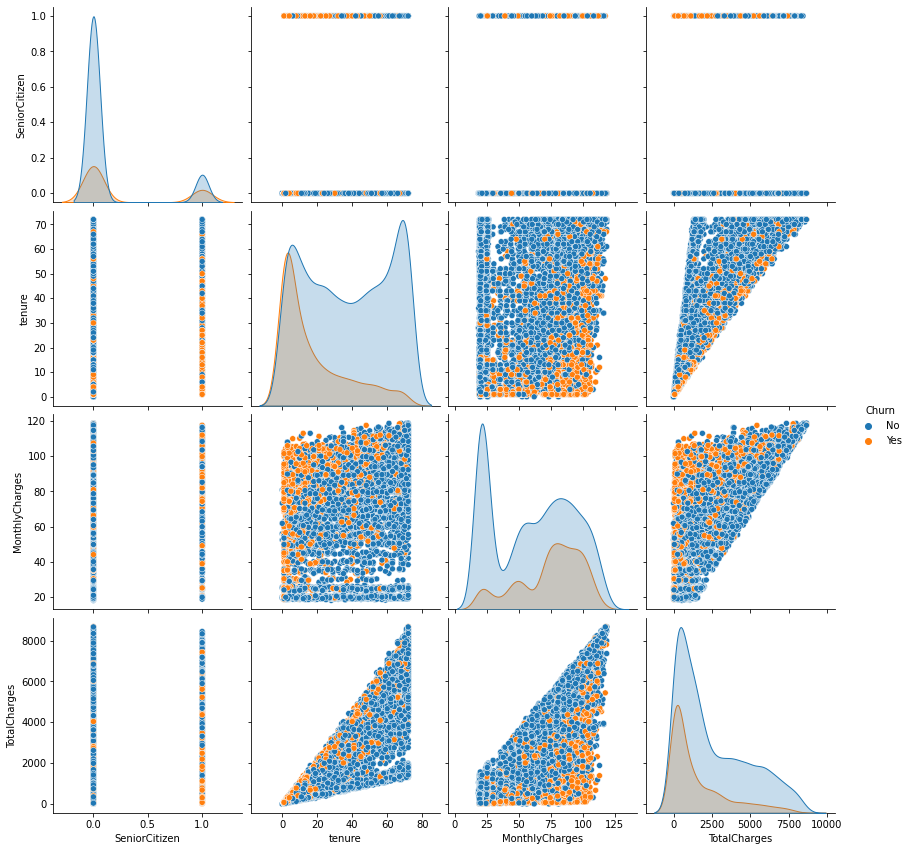

In [ ]:
import seaborn as sns

sns.pairplot(data, hue='Churn', height=3)
plt.show()

#**Stage 3 - Exploratory Data Analysis**

,Churn
No,5174
Yes,1869


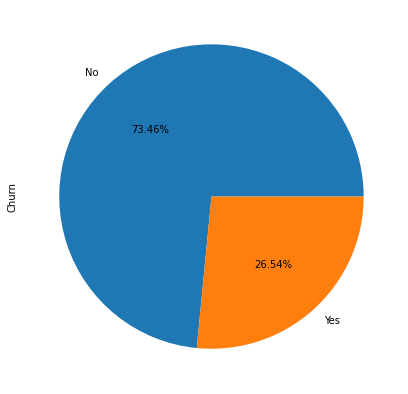

In [ ]:
churn = pd.DataFrame(data['Churn'].value_counts())
churn['Churn'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
churn

##Analysis of Gender Column

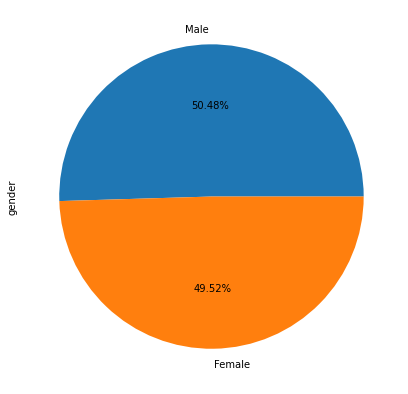

In [ ]:
#Proportion of Gender
gender = pd.DataFrame(data['gender'].value_counts())
gender['gender'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')


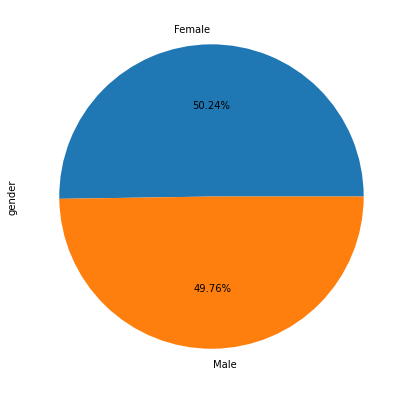

In [ ]:
#Churn analysis based on gender
gender_c = pd.DataFrame(data[data['Churn'] == 'Yes']['gender'].value_counts())
gender_c['gender'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')


##Analysis of Senior Citizen Column

,SeniorCitizen
0,5901
1,1142


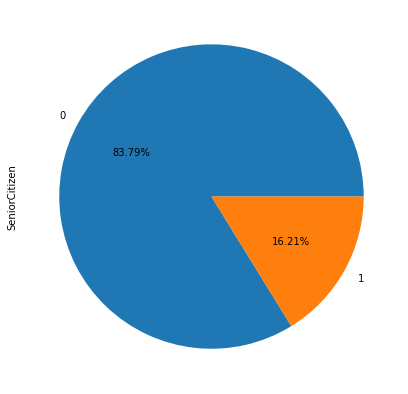

In [19]:
#Proportion of Senior Citizen
Snr = pd.DataFrame(data['SeniorCitizen'].value_counts())
Snr
Snr['SeniorCitizen'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
Snr

,Churn
No,666
Yes,476


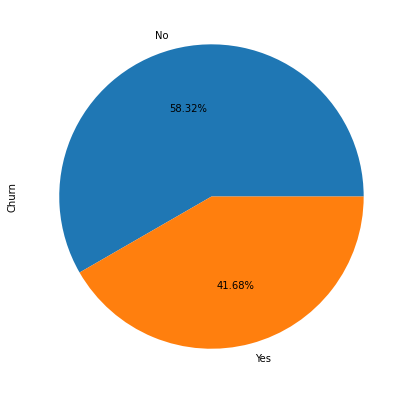

In [ ]:
#Churn analysis based on senior citizen column
Snr_Chruned = pd.DataFrame(data[data['SeniorCitizen'] == 1]['Churn'].value_counts())
Snr_Chruned['Churn'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
Snr_Chruned

,Churn
No,4508
Yes,1393


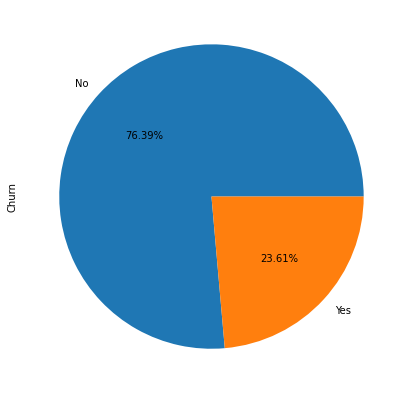

In [ ]:
#Churn analysis based on senior citizen column
NoSnr_Chruned = pd.DataFrame(data[data['SeniorCitizen'] == 0]['Churn'].value_counts())
NoSnr_Chruned['Churn'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
NoSnr_Chruned

## Analysis of  Partner, Dependents, PhoneService, and PaperlessBilling Columns

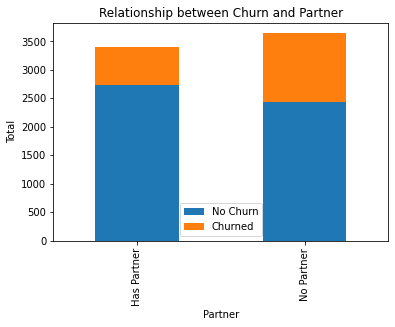

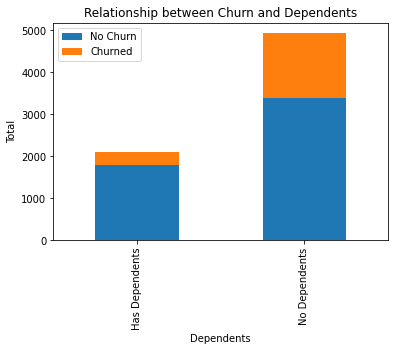

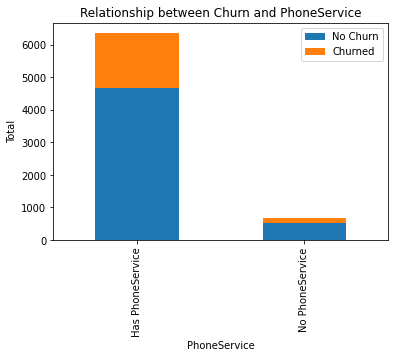

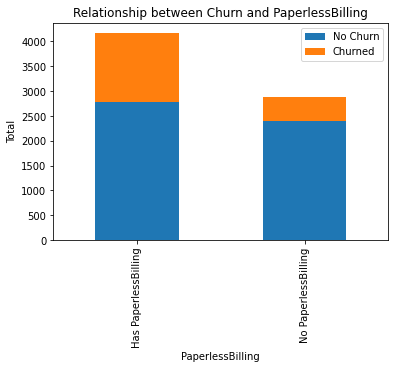

In [23]:
#Columns that have 'Yes' or 'No'
list_columns = ['Partner', 'Dependents','PhoneService','PaperlessBilling']

for i in range(len(list_columns)):
  data_vis1 = data.loc[(data[list_columns[i]] == 'Yes')]
  df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
  df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Has '+list_columns[i]})

  data_vis2 = data.loc[(data[list_columns[i]] == 'No')]
  df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
  df_data_vis2 = df_data_vis2.rename(columns={'Churn':'No '+list_columns[i]})

  joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
  joined_df = joined_df.reset_index()
  joined_df = joined_df.rename(columns = {'index':'Churn'})

  trans = joined_df.T.reset_index()
  trans = trans.rename(columns = {'index':list_columns[i], 0:'No Churn', 1:'Churned'})
  trans = trans.drop(index = 0, axis = 0)

  trans.plot(x=list_columns[i], kind='bar', stacked=True, ylabel = 'Total',
        title='Relationship between Churn and '+list_columns[i])

  i+=1

##Analysis of Online Security, Online Backup, Device Protection, TechSupport, Streaming TV, Streaming Movies Columns

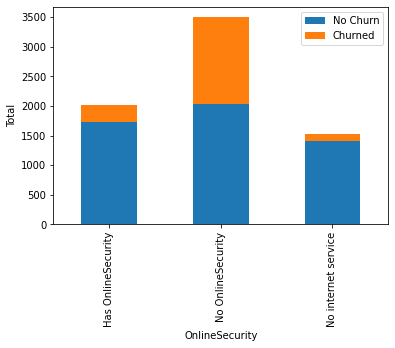

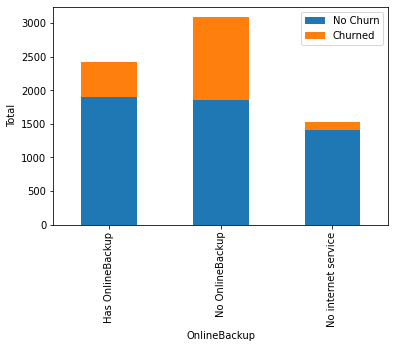

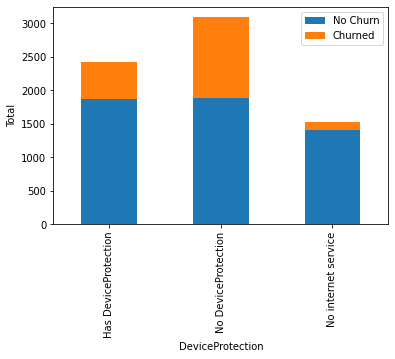

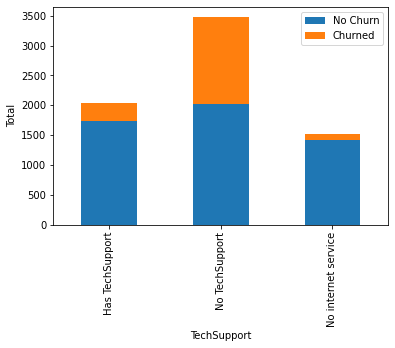

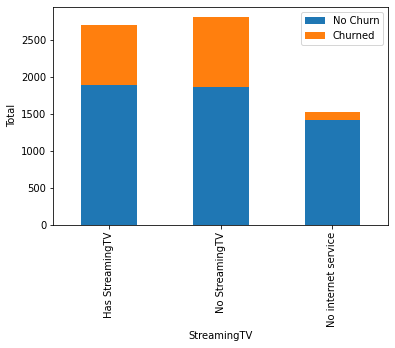

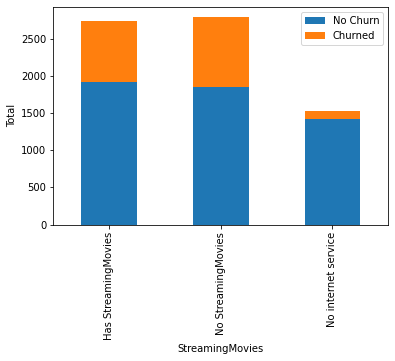

In [ ]:
#Columns that have 'Yes', 'No', 'No internet service'
list_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

for i in range(len(list_columns)):
  data_vis1 = data.loc[(data[list_columns[i]] == 'Yes')]
  df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
  df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Has '+list_columns[i]})

  data_vis2 = data.loc[(data[list_columns[i]] == 'No')]
  df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
  df_data_vis2 = df_data_vis2.rename(columns={'Churn':'No '+list_columns[i]})

  data_vis3 = data.loc[(data[list_columns[i]] == 'No internet service')]
  df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
  df_data_vis3 = df_data_vis3.rename(columns={'Churn':'No internet service'})

  joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
  joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
  joined_df2 = joined_df2.reset_index()
  joined_df2 = joined_df2.rename(columns = {'index':'Churn'})

  trans = joined_df2.T.reset_index()
  trans = trans.rename(columns = {'index':list_columns[i], 0:'No Churn', 1:'Churned'})
  trans = trans.drop(index = 0, axis = 0)

  trans.plot(x=list_columns[i], kind='bar', stacked=True, ylabel = 'Total')

  i+=1

##Analysis of MultipleLines Column

In [ ]:
df_pivot1 = pd.pivot_table(data[['customerID','Churn','MultipleLines']], 
values=None, index = ['Churn'], columns='MultipleLines',aggfunc=len)
df_pivot1

customerID                       
MultipleLines         No No phone service   Yes
Churn                                          
No                  2541              512  2121
Yes                  849              170   850

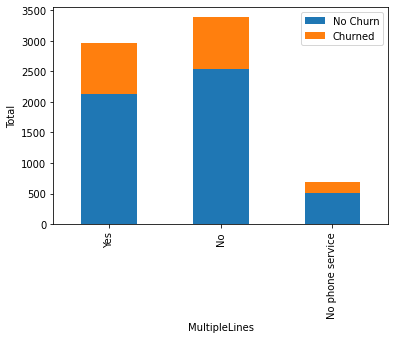

In [24]:
data_vis1 = data.loc[(data['MultipleLines'] == 'Yes')]
df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Yes'})

data_vis2 = data.loc[(data['MultipleLines'] == 'No')]
df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
df_data_vis2 = df_data_vis2.rename(columns={'Churn':'No'})

data_vis3 = data.loc[(data['MultipleLines'] == 'No phone service')]
df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
df_data_vis3 = df_data_vis3.rename(columns={'Churn':'No phone service'})

joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
joined_df2 = joined_df2.reset_index()
joined_df2 = joined_df2.rename(columns = {'index':'Churn'})

trans = joined_df2.T.reset_index()
trans = trans.rename(columns = {'index':'MultipleLines', 0:'No Churn', 1:'Churned'})
trans = trans.drop(index = 0, axis = 0)

trans.plot(x='MultipleLines', kind='bar', stacked=True, ylabel = 'Total')

##Analysis of Internet Service Column

In [ ]:
df_pivot1 = pd.pivot_table(data[['customerID','Churn','InternetService']], 
values=None, index = ['Churn'], columns='InternetService',aggfunc=len)
df_pivot1

customerID                  
InternetService        DSL Fiber optic    No
Churn                                       
No                    1962        1799  1413
Yes                    459        1297   113

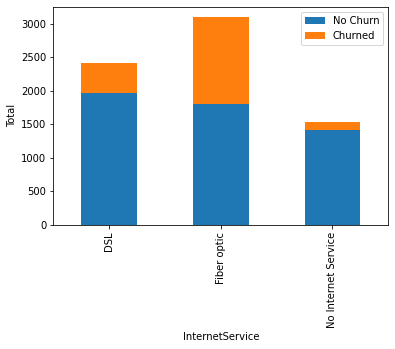

In [35]:
data_vis1 = data.loc[(data['InternetService'] == 'DSL')]
df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
df_data_vis1 = df_data_vis1.rename(columns={'Churn':'DSL'})

data_vis2 = data.loc[(data['InternetService'] == 'Fiber optic')]
df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
df_data_vis2 = df_data_vis2.rename(columns={'Churn':'Fiber optic'})

data_vis3 = data.loc[(data['InternetService'] == 'No')]
df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
df_data_vis3 = df_data_vis3.rename(columns={'Churn':'No Internet Service'})

joined_df = df_data_vis1.join(df_data_vis2)
joined_df2 = joined_df.join(df_data_vis3)
joined_df2 = joined_df2.reset_index()
joined_df2 = joined_df2.rename(columns = {'index':'Churn'})

trans = joined_df2.T.reset_index()
trans = trans.rename(columns = {'index':'InternetService', 0:'No Churn', 1:'Churned'})
trans = trans.drop(index = 0, axis = 0)

trans.plot(x='InternetService', kind='bar', stacked=True, ylabel = 'Total')

##Analysis of Contract Column

In [ ]:
df_pivot1 = pd.pivot_table(data[['customerID','Churn','Contract']], 
values=None, index = ['Churn'], columns='Contract',aggfunc=len)
df_pivot1

customerID                  
Contract Month-to-month One year Two year
Churn                                    
No                 2220     1307     1647
Yes                1655      166       48

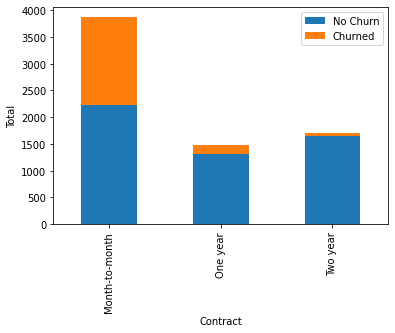

In [51]:
data_vis1 = data.loc[(data['Contract'] == 'Month-to-month')]
df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Month-to-month'})

data_vis2 = data.loc[(data['Contract'] == 'One year')]
df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
df_data_vis2 = df_data_vis2.rename(columns={'Churn':'One year'})

data_vis3 = data.loc[(data['Contract'] == 'Two year')]
df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
df_data_vis3 = df_data_vis3.rename(columns={'Churn':'Two year'})

joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
joined_df2 = joined_df2.reset_index()
joined_df2 = joined_df2.rename(columns = {'index':'Churn'})

trans = joined_df2.T.reset_index()
trans = trans.rename(columns = {'index':'Contract', 0:'No Churn', 1:'Churned'})
trans = trans.drop(index = 0, axis = 0)

trans.plot(x='Contract', kind='bar', stacked=True, ylabel = 'Total')

##Analysis of PaymentMethod Column

In [ ]:
df_pivot1 = pd.pivot_table(data[['customerID','Churn','PaymentMethod']], 
values=None, index = ['Churn'], columns='PaymentMethod',aggfunc=len)
df_pivot1

customerID  ...             
PaymentMethod Bank transfer (automatic)  ... Mailed check
Churn                                    ...             
No                                 1286  ...         1304
Yes                                 258  ...          308

[2 rows x 4 columns]

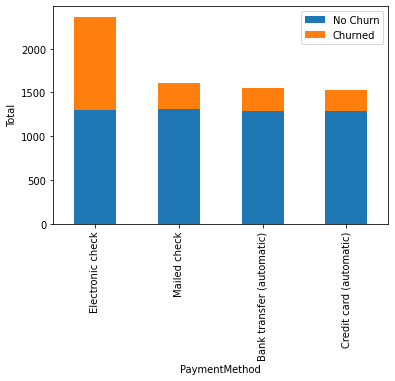

In [ ]:
data_vis1 = data.loc[(data['PaymentMethod'] == 'Electronic check')]
df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Electronic check'})

data_vis2 = data.loc[(data['PaymentMethod'] == 'Mailed check')]
df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
df_data_vis2 = df_data_vis2.rename(columns={'Churn':'Mailed check'})

data_vis3 = data.loc[(data['PaymentMethod'] == 'Bank transfer (automatic)')]
df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
df_data_vis3 = df_data_vis3.rename(columns={'Churn':'Bank transfer (automatic)'})

data_vis4 = data.loc[(data['PaymentMethod'] == 'Credit card (automatic)')]
df_data_vis4 = pd.DataFrame(data_vis4['Churn'].value_counts(normalize = False))
df_data_vis4 = df_data_vis4.rename(columns={'Churn':'Credit card (automatic)'})

joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
joined_df3 = joined_df2.join(df_data_vis4, lsuffix = '_')
joined_df3 = joined_df3.reset_index()
joined_df3 = joined_df3.rename(columns = {'index':'Churn'})

trans = joined_df3.T.reset_index()
trans = trans.rename(columns = {'index':'PaymentMethod', 0:'No Churn', 1:'Churned'})
trans = trans.drop(index = 0, axis = 0)

trans.plot(x='PaymentMethod', kind='bar', stacked=True, ylabel = 'Total')

##Analysis of Tenure Column

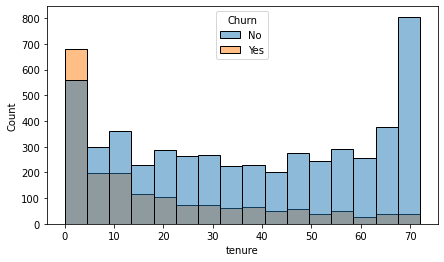

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=data, x='tenure', hue = 'Churn' )
plt.show()

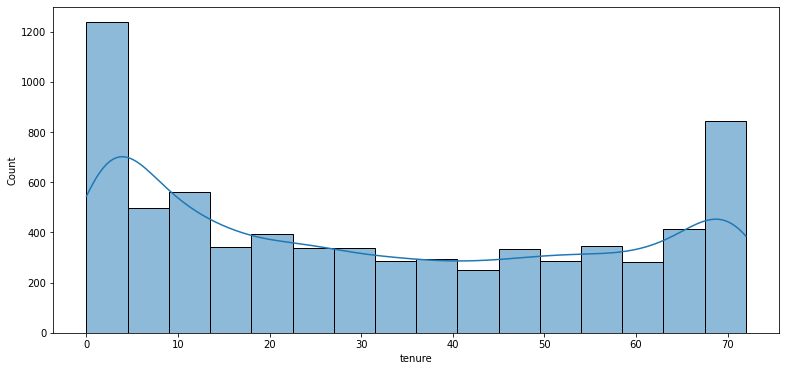

In [ ]:
#Analysis of distribution and skewness
plt.figure(figsize=(13,6))
sns.histplot(data=data, x='tenure', kde=True)
plt.show()

##Analysis of MonthlyCharges Column

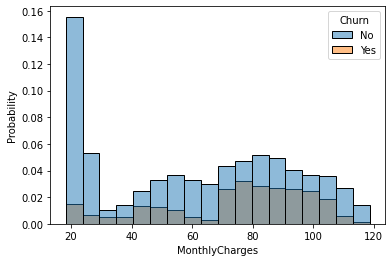

In [ ]:
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', stat='probability')
plt.show()

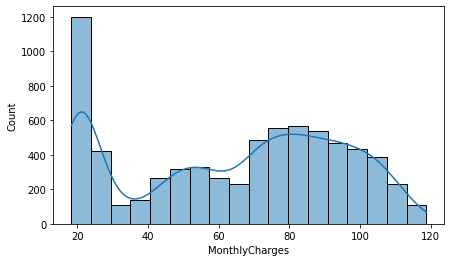

In [ ]:
#Analysis of distribution and skewness
plt.figure(figsize=(7,4))
sns.histplot(data=data, x='MonthlyCharges', kde=True, )
plt.show()

In [ ]:
#Skewness Coeficient
from scipy.stats import skew
print('koefisien Skewness MonthlyCharges :',skew(data['MonthlyCharges']))

#Penjelasan : Berdasarkan perhitungan diatas, dapat disimpulkan bahwa data MonthlyCharges memiliki distribusi yang negatively skewed atau left skewness karena koefisien bernilai negatif. Artinya data MonthlyCharges sedikit condong ke kiri . Adapun karena nilai koefisien berada pada rentang -0,5 dan 0,5 maka data ini termasuk fairly symmetrical (hampir simetris)

koefisien Skewness MonthlyCharges : -0.2204774644391769


##Analysis of Total Charges Column

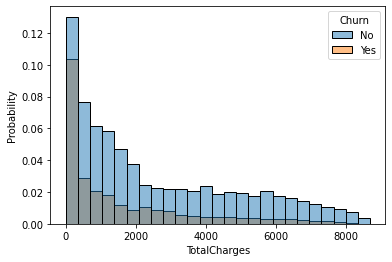

In [ ]:
sns.histplot(data=data, x='TotalCharges', hue='Churn', stat='probability')
plt.show()

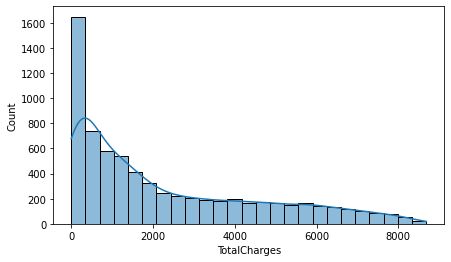

In [ ]:
#Analysis of distribution and skewness
plt.figure(figsize=(7,4))
sns.histplot(data=data, x='TotalCharges', kde=True, )
plt.show()

In [ ]:
#Menentukan nilai koefisien skewness 
from scipy.stats import skew
print('koefisien Skewness TotalCharges :',skew(data['TotalCharges']))

#Penjelasan : Berdasarkan perhitungan diatas, dapat disimpulkan bahwa data TotalCharges memiliki distribusi yang positively skewed atau right skewness karena koefisien bernilai positif. Artinya data TotalCharges sedikit condong ke kanan . Adapun karena nilai koefisien berada pada rentang 0,5 dan 1 maka data ini termasuk moderately skewed (Agak miring)

koefisien Skewness TotalCharges : 0.9630294954586066


##Correlation

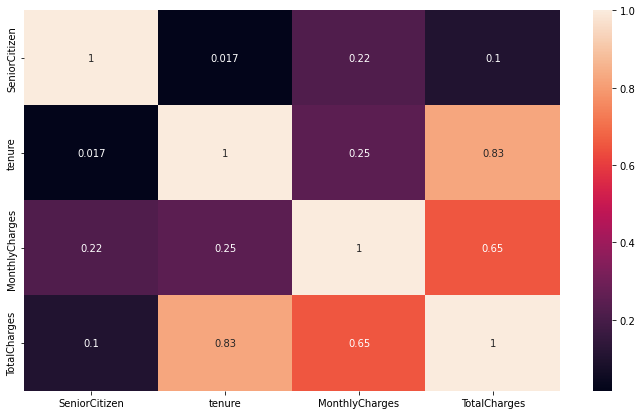

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

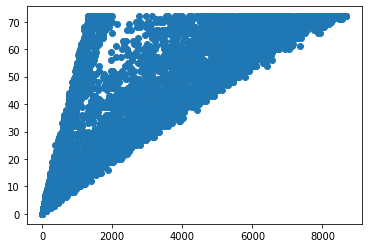

In [ ]:
plt.scatter(x=data['TotalCharges'], y=data['tenure'], marker='o')

#**Stage 4 - Data Preprocessing**

##Check on Missing Values

In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
def col_un(column) :
  return data[column].unique()
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
d = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [ ]:
for i in d :
  print(f'{i}', col_un(i))

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


##LabelEncoder for each Categorical Attributes 

In [57]:
from sklearn.preprocessing import LabelEncoder

data_x = data.drop(['customerID','Churn'],axis=1)
data_y = data[['Churn']]

nums = data_x.select_dtypes(include=['int64', 'float64','float64']).columns
cats = data_x.select_dtypes(include=['object','bool']).columns

le = LabelEncoder()
for i in cats:
  data_x[i] = le.fit_transform(data_x[i])

data_y['Churn'] = le.fit_transform(data_y)

data_y.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
data_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
def col_un(column) :
  return data_x[column].unique()
data_x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
data_x_list= ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [ ]:
for i in data_x_list :
  print(f'{i}', col_un(i))

gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService [0 1]
MultipleLines [1 0 2]
InternetService [0 1 2]
OnlineSecurity [0 2 1]
OnlineBackup [2 0 1]
DeviceProtection

##Correlation

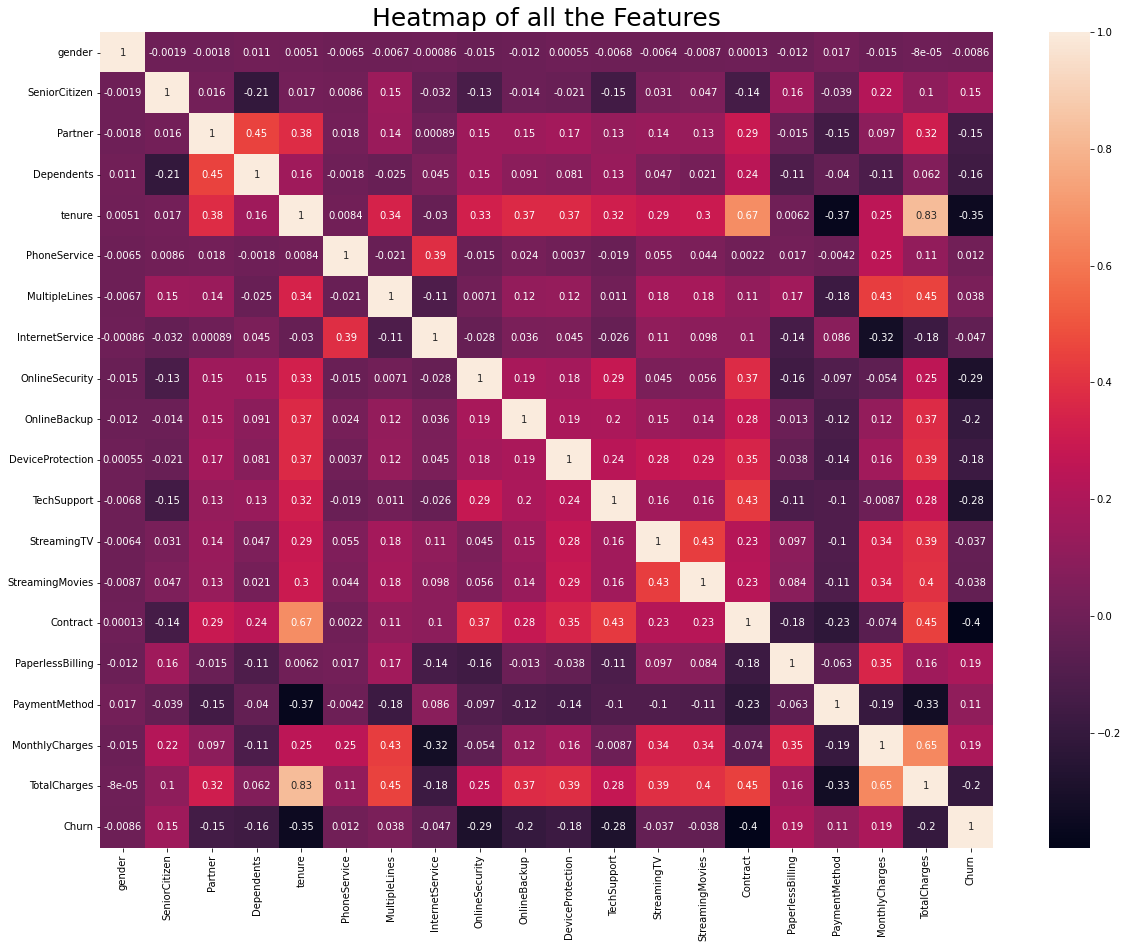

In [ ]:
data_encoded_label= pd.concat([data_x, data_y], axis=1)
plt.figure(figsize=(20,15))
sns.heatmap(data_encoded_label.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 25);
plt.show()

In [ ]:
data_e = data.drop(['customerID'], axis = 1)
data_e['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_e['Churn'].replace(to_replace='No',  value=0, inplace=True)
data_e.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
data_encoded_onehot = pd.get_dummies(data_e, prefix_sep="_")
data_encoded_onehot = data_encoded_onehot.dropna()
display(data_encoded_onehot.shape)
data_encoded_onehot.head()

(7043, 46)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
def col_un(column) :
  return data_encoded_onehot[column].unique()
data_encoded_onehot.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [ ]:
data_encoded_onehot_list = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [ ]:
for i in data_encoded_onehot_list :
  print(f'{i}', col_un(i))

SeniorCitizen [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
gender_Female [1 0]
gender_Male [0 1]
Partner_No [0 1]
Partner_Yes [1 0]
Dependents_No [1 0]
Dependents_Yes [0 1]
PhoneService_No [1 0]
PhoneService_Yes [0 1]
MultipleLines_No [0 1]
MultipleLines_No phone service [1 0]
MultipleLines_Yes [0 1]
InternetService_DSL [1 0]
InternetService_Fiber optic [0 1]
InternetService_No [0 1]
OnlineSecurity_No [1 0]
OnlineSecurity_No internet service [0 1]
OnlineSecurity_Yes [0 1]
OnlineBackup_No [0 1]
OnlineBackup_No internet service [0 1]
OnlineBackup_Yes [1 0]
DeviceProtection_No [1 0]
DeviceProtection_No internet service [0 1]
DeviceProtection_Yes [0 1]
TechSupport_No [1 0]
TechSu

In [ ]:
#data_encoded_label= pd.concat([data_x, data_y], axis=1)
#plt.figure(figsize=(20,15))
#sns.heatmap(data_encoded_label.corr(), annot=True)
#plt.title("Heatmap of all the Features", fontsize = 25);
#plt.show()

##Min Max Scaler

### Tenure Column

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

t = np.array(data_x['tenure']).reshape(-1,1) 
scaler.fit(t)

data_x['tenure'] = scaler.transform(t)
data_x.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462


###Monthly Charges Column

In [62]:
m = np.array(data_x['MonthlyCharges']).reshape(-1,1)
scaler.fit(m)

data_x['MonthlyCharges'] = scaler.transform(m)
data_x.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462


###Total Charges Column

In [60]:
y = np.array(data_x['TotalCharges']).reshape(-1,1)
scaler.fit(y)

data_x['TotalCharges'] = scaler.transform(y)
data_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462


#**Stage 5 - Modelling**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.25, random_state = 0)

In [ ]:
#x_train.head()
#y_train.head()


##Default Parameter

###Logistic Regression

In [73]:

lr = LogisticRegression(random_state = 40)
lr.fit(x_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
prediction = lr.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7955706984667802
Confusion Matrix  
 [[1156  142]
 [ 218  245]]
Recall :  0.5291576673866091
Precision :  0.6330749354005168


In [75]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1298
           1       0.63      0.53      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [76]:
print(classification_report(y_test,  prediction))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1298
           1       0.63      0.53      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



##Decison Tree

In [ ]:
dt = DecisionTreeClassifier(random_state = 40, max_depth = 6)
dt.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [ ]:
prediction = dt.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7762634866553095
Confusion Matrix  
 [[1151  147]
 [ 247  216]]
Recall :  0.46652267818574517
Precision :  0.5950413223140496


In [ ]:
print(classification_report(y_test,  prediction))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1298
           1       0.63      0.53      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



##KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
prediction = knn.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7410562180579217
Confusion Matrix  
 [[1085  213]
 [ 243  220]]
Recall :  0.47516198704103674
Precision :  0.5080831408775982


In [ ]:
print(classification_report(y_test,  prediction))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1298
           1       0.51      0.48      0.49       463

    accuracy                           0.74      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.74      0.74      0.74      1761



##SVM

In [ ]:
sv = svm.SVC()
sv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction = sv.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7819420783645656
Confusion Matrix  
 [[1175  123]
 [ 261  202]]
Recall :  0.43628509719222464
Precision :  0.6215384615384615


In [ ]:
print(classification_report(y_test,  prediction))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1298
           1       0.62      0.44      0.51       463

    accuracy                           0.78      1761
   macro avg       0.72      0.67      0.69      1761
weighted avg       0.77      0.78      0.77      1761



##Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
prediction = gnb.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.747870528109029
Confusion Matrix  
 [[984 314]
 [130 333]]
Recall :  0.7192224622030238
Precision :  0.5146831530139103


In [ ]:
print(classification_report(y_test,  prediction))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1298
           1       0.51      0.72      0.60       463

    accuracy                           0.75      1761
   macro avg       0.70      0.74      0.71      1761
weighted avg       0.79      0.75      0.76      1761



##Gradient Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=40)
gb_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
prediction = gb_clf.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.794434980124929
Confusion Matrix  
 [[1159  139]
 [ 223  240]]
Recall :  0.5183585313174947
Precision :  0.633245382585752


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,  prediction))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1298
           1       0.63      0.52      0.57       463

    accuracy                           0.79      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761

